In [23]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm import tqdm

import subprocess
import ffmpeg
from PIL import Image



In [ ]:
ipd.Video('epi2.mp4', width=700)

In [ ]:
# Load in video capture
cap = cv2.VideoCapture('epi2.mp4')

In [ ]:
# Total number of frames in video
cap.get(cv2.CAP_PROP_FRAME_COUNT)

1421.0

In [ ]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 720.0, Width 1280.0


In [ ]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 29.97


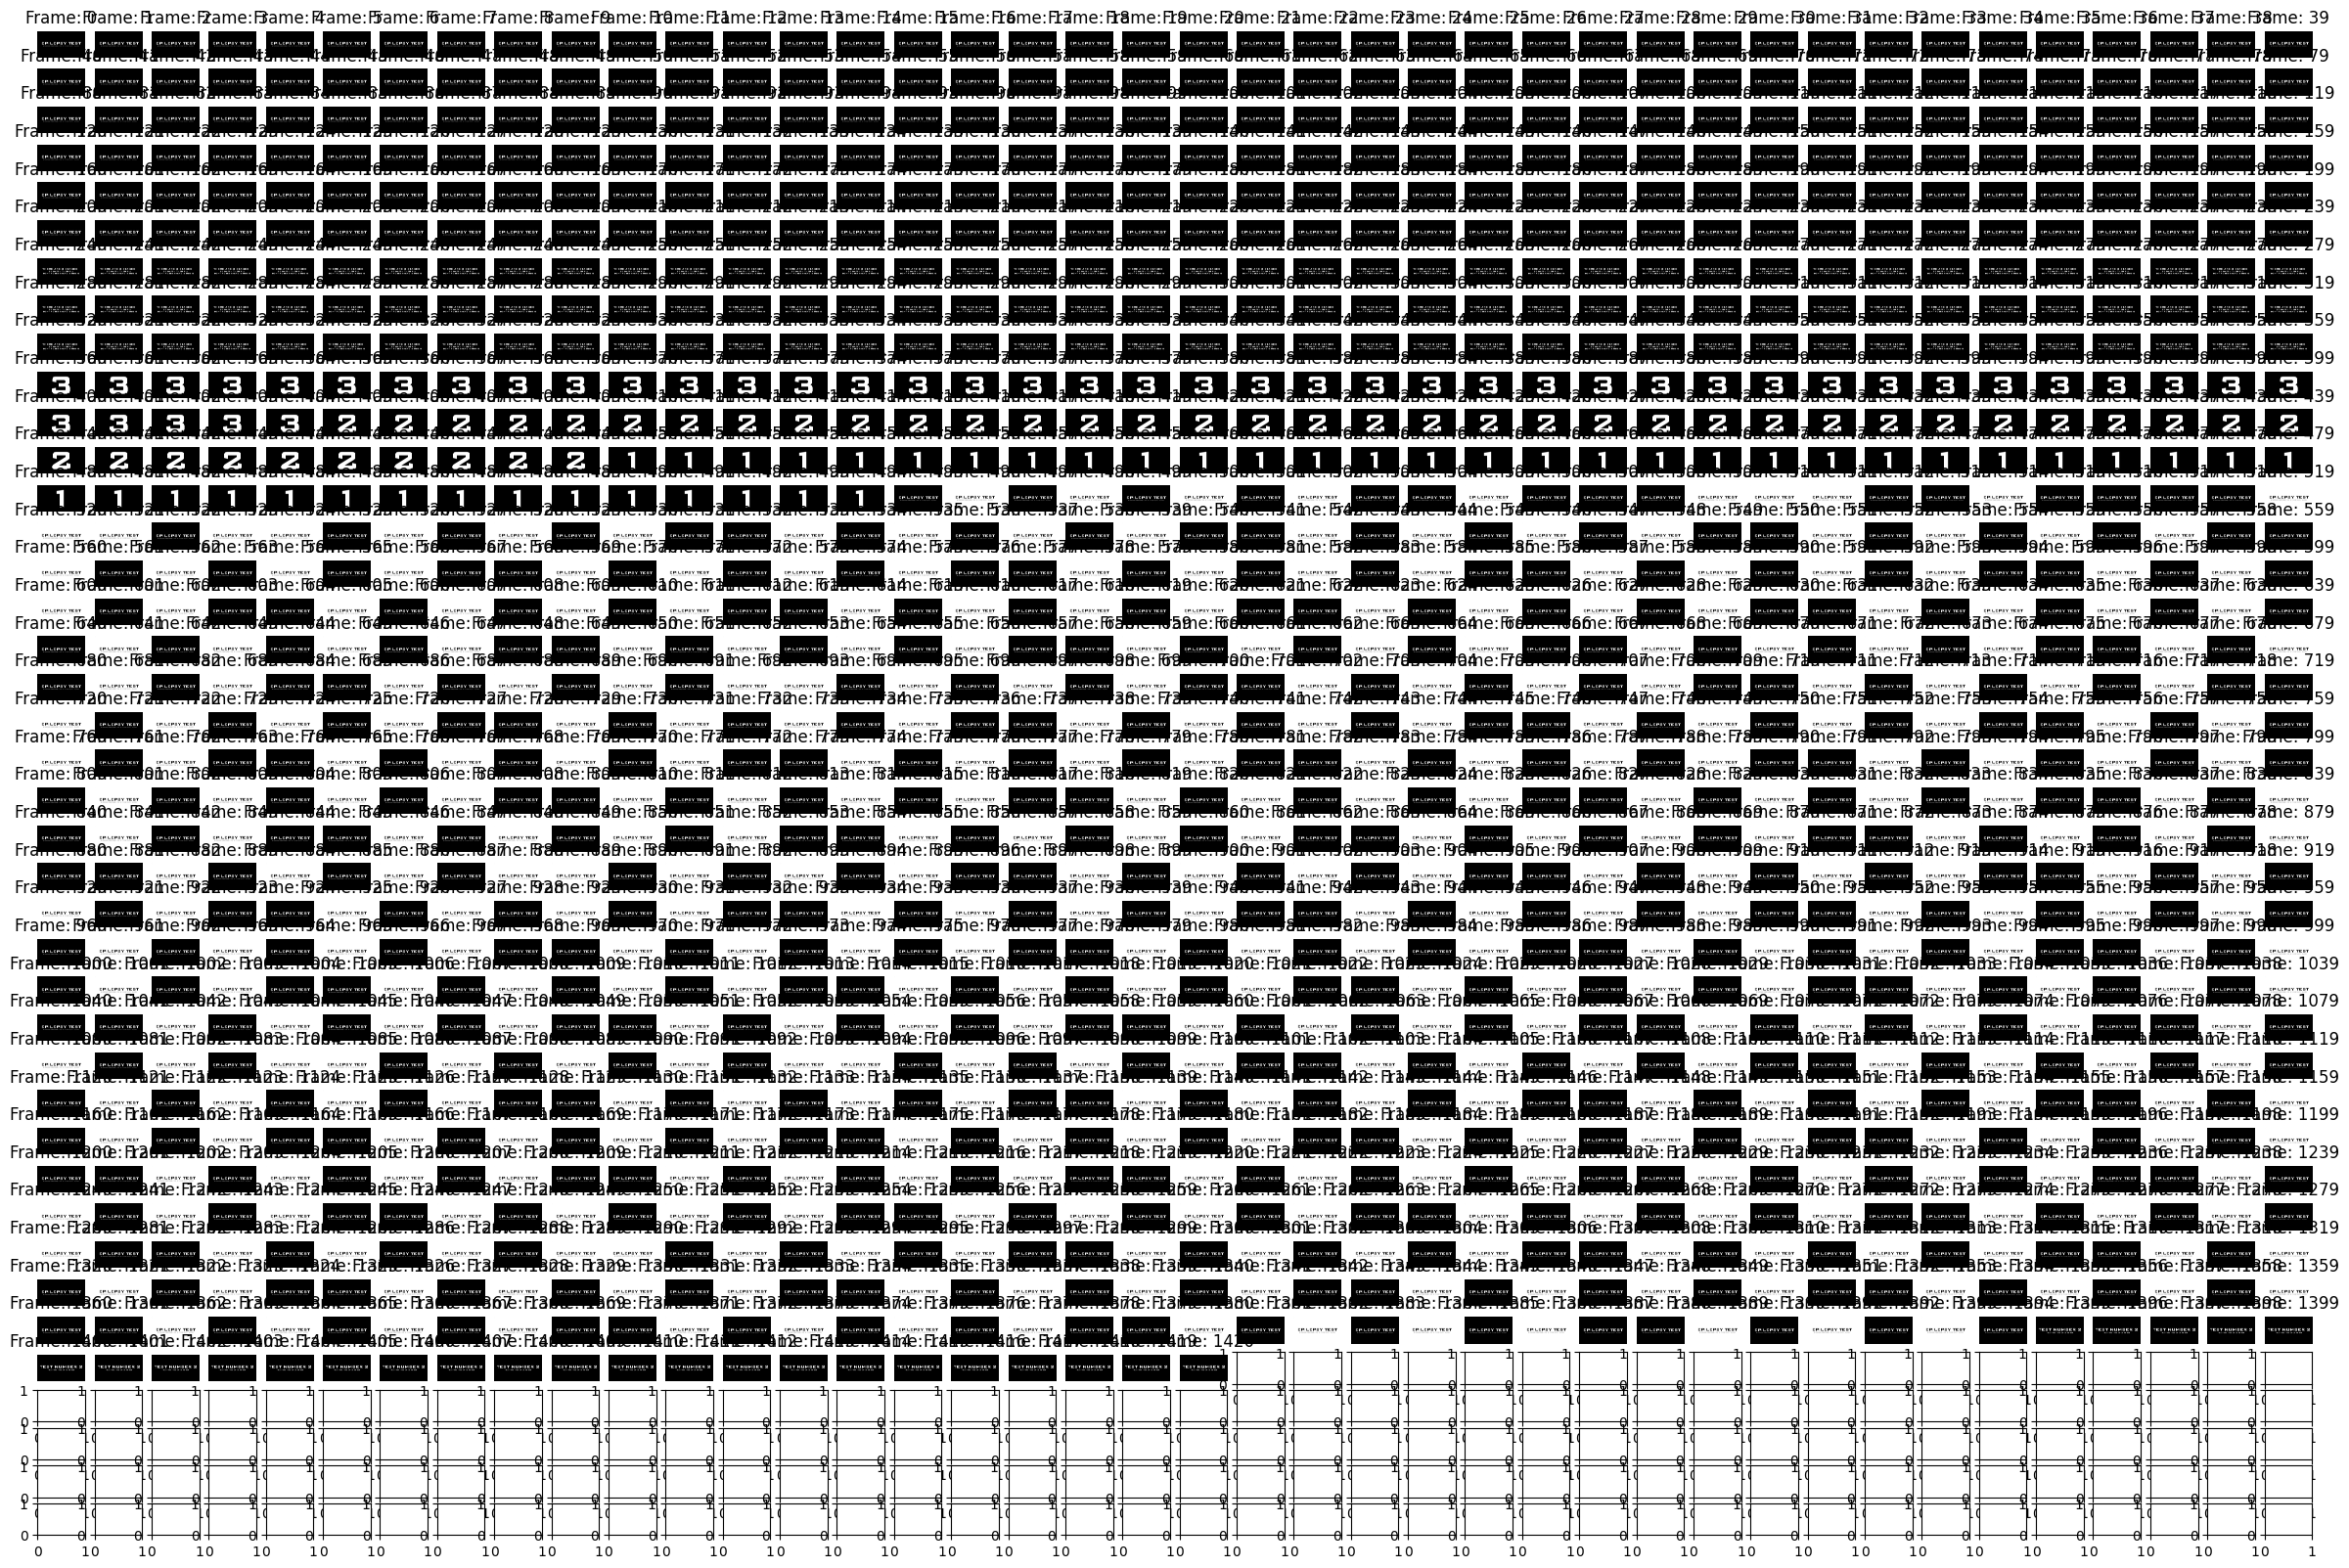

In [16]:
fig, axs = plt.subplots(40, 40, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture("epi2.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 1 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

#plt.tight_layout()
plt.show()
cap.release()

In [46]:
# Pull frame 10

cap = cv2.VideoCapture("epi.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame == 575:
        break
cap.release()

In [50]:
# Pull frame 10

cap = cv2.VideoCapture("epi.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img1 = cap.read()
    if ret == False:
        break
    if frame == 574:
        break
cap.release()

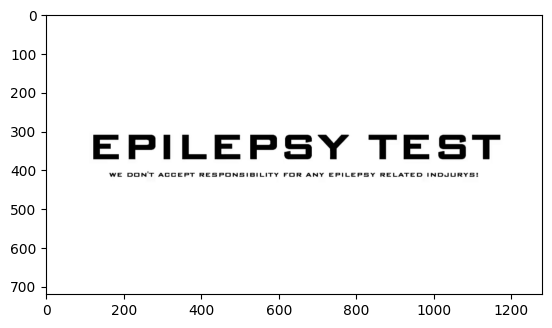

In [55]:
plt.imshow(img1)
plt.show()

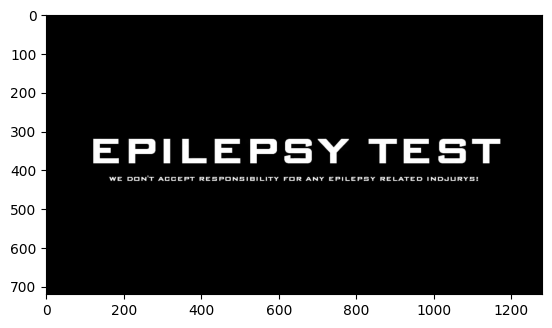

In [56]:
plt.imshow(img)
plt.show()

In [5]:
x=np.sum(img == 0)
print(x)
y=np.sum(img1 == 0)
print(y)
if(x==y):
    print('same')
elif (x!=y):
    print('diff')

NameError: name 'np' is not defined

In [3]:
number_of_black_pix = np.sum(img)
print('Number of black pixels:', number_of_black_pix)

NameError: name 'np' is not defined

In [2]:
im = Image.open('1.png','r')

NameError: name 'Image' is not defined

In [6]:
pix_val = list(im.getdata())
pix_val_flat = [x for sets in pix_val for x in sets]
print(pix_val)

NameError: name 'im' is not defined

In [ ]:
cv2.rectangle(frame, (100, 100), (300, 300), (255, 0, 0), 2)


In [ ]:
roi = frame[100:300, 100:300]




In [ ]:
# Convert the image to grayscale
roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

In [ ]:
YOUR_FILE = 'epi.mp4'
probe1 = ffmpeg.probe(YOUR_FILE)
time = float(probe1['streams'][0]['duration']) // 2
width = probe1['streams'][0]['width']

# Set how many spots you want to extract a video from. 
parts = 7

intervals = time // parts
intervals = int(intervals)
interval_list = [(i * intervals, (i + 1) * intervals) for i in range(parts)]
i = 0

for item in interval_list:
    (
        ffmpeg.input(YOUR_FILE, ss=item[1]).filter('scale', width, -1).output('Image' + str(i) + '.jpg', vframes=1).run()
    )
    i += 1

AttributeError: module 'ffmpeg' has no attribute 'probe'